In [1]:
import yfinance as yf
import pandas as pd
import datetime 
import plotly.graph_objects as go

In [2]:
tickerSymbol = "GOOGL"
tickerData = yf.Ticker(tickerSymbol)
print(tickerData)

yfinance.Ticker object <GOOGL>


In [7]:
tickerDf = tickerData.history(period="6mo")
tickerDf

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-08-04 00:00:00-04:00,189.995674,194.967982,189.825939,194.738327,31547400,0.0,0.0
2025-08-05 00:00:00-04:00,194.408858,197.553980,193.590119,194.368912,31602300,0.0,0.0
2025-08-06 00:00:00-04:00,194.199160,196.325871,193.370442,195.786697,21562900,0.0,0.0
2025-08-07 00:00:00-04:00,196.755207,197.234461,194.029434,196.216049,26321800,0.0,0.0
2025-08-08 00:00:00-04:00,196.914959,202.296621,196.865033,201.108459,39161800,0.0,0.0
...,...,...,...,...,...,...,...
2026-01-27 00:00:00-05:00,335.369995,337.910004,333.480011,334.549988,21636200,0.0,0.0
2026-01-28 00:00:00-05:00,336.059998,337.540009,331.940002,336.010010,27434400,0.0,0.0
2026-01-29 00:00:00-05:00,340.299988,342.290009,326.540009,338.250000,39785600,0.0,0.0


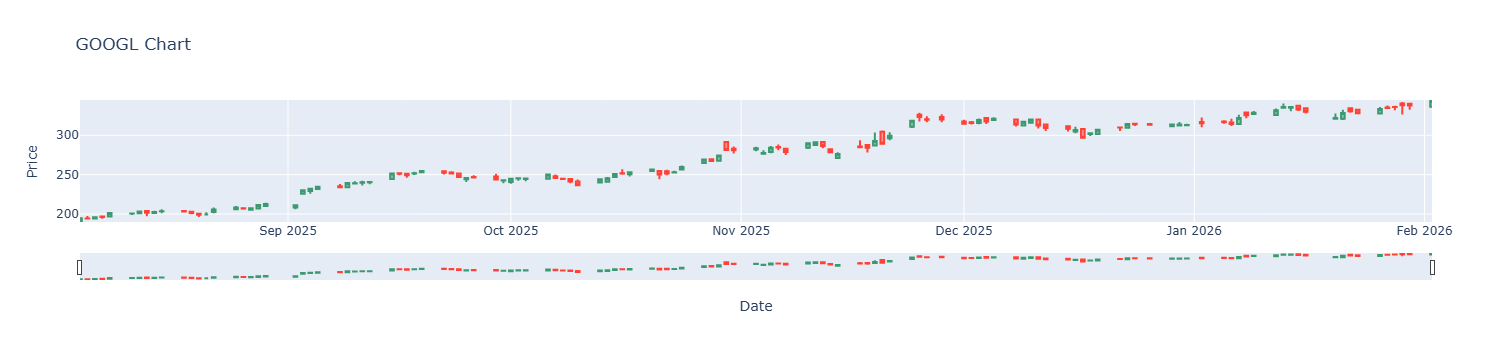

In [18]:
tickerDf_copied = tickerDf.copy()
timeFrameDf = pd.to_datetime(tickerDf_copied.index).tz_localize(None)
fig = go.Figure(
    data = [
        go.Candlestick(
            x = timeFrameDf.to_pydatetime(),
            low = tickerDf["Low"].to_numpy(),
            high = tickerDf["High"].to_numpy(),
            close = tickerDf["Close"].to_numpy(),
            open = tickerDf["Open"].to_numpy()
        )
    ]
)
fig.update_xaxes(
    type = "date",
    autorange = False,
    range = [timeFrameDf.min(),timeFrameDf.max()]
)
fig.update_yaxes(
    type = "linear",
    autorange = False,
    range = [tickerDf["Low"].min(),tickerDf["High"].max()]
)
fig.update_layout(title=f"{tickerSymbol} Chart",
                 xaxis_title = "Date",
                 yaxis_title = "Price",
                 xaxis_rangeslider = dict(range=[timeFrameDf.min(),timeFrameDf.max()]),
                 yaxis = dict(range=[tickerDf_copied["Low"].min(),tickerDf_copied["High"].max()])
                 )
fig.show()

In [33]:
tickerDf_copied = tickerDf_copied.reset_index(inplace=True)

In [32]:
pd.to_datetime(tickerDf_copied["Date"]).dt.tz_localize(None)

0     2025-08-04
1     2025-08-05
2     2025-08-06
3     2025-08-07
4     2025-08-08
         ...    
121   2026-01-27
122   2026-01-28
123   2026-01-29
124   2026-01-30
125   2026-02-02
Name: Date, Length: 126, dtype: datetime64[ns]

In [29]:
tickerDf_copied.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')